# 베이즈정리와 정규분포의 곱


# 0. 들어가며
<hr/>
<img src="fig3.png">

- 베이즈정리에 의해 사후확률분포를 구하려면 가능도<sup>likelihood</sup>와 사전확률을 곱하고 이를 데이터의 주변확률로 나눠야 한다.<br/>

- 관찰된 데이터가 정규분포를 따르고, 독립이라고 가정하면 가능도는 정규분포의 곱이된다. <br/>

- 이런 가능도에 대해 사전확률분포를 정규분포로 선택하면 사후확률분포도 정규분포를 따르게 되므로 정규분포는 정규분포의 공액사전분포이다.<br/>

- 정규분포의 곱은 어떤 상수가 곱해진 정규분포가 되므로 사후확률분포는 가능도와 사전확률분포의 곱에 비례한다.<br/>

- 사후확률분포가 정규분포가 된다는 사실을 이미 알고 있으므로 가능도와 사전확률분포의 곱을 정규화시킬 필요없이 평균과 표준편차만을 구하면 온전한 사후확률분포를 얻을 수 있다.<br/>

- 이것은 가능도와 사전확률분포의 곱에서 $\text{exp}(\cdot)$항 내부를 완전제곱꼴<sup>completing the square</sup>로 고치는 과정으로 구하게 된다.<br/>

- 본 문서에서는 베이즈정리에 따라 가능도와 사전확률을 곱하고, 가능도를 $\mu$에 대해 주변화<sup>marginalizing</sup>시킨 $p(D)$로 앞의 곱을 나눠봄으로써 실제 사후확률의 분포가 완전한 정규분포 pdf가 되는것을 확인해본다.<br/>


# 1. 두 정규분포의 곱
<hr/>

- 정규분포 두 개를 곱하면 정규화되지 않은 특정 상수가 곱해진 정규분포<sup>scaled gaussian</sup>가 됨을 알 수 있다. 두 정규분포가

$$
f(x) = \frac{1}{ \sqrt{2 \pi} \sigma_{f} } \text{exp}\left\{{-\frac{(x-\mu_f)^2}{2 \sigma^{2}_{f}}}\right\} \tag{1.1}\\
g(x) = \frac{1}{ \sqrt{2 \pi} \sigma_{g} } \text{exp}\left\{{-\frac{(x-\mu_g)^2}{2 \sigma^{2}_{g}}}\right\} 
$$

일 때 두 정규분포의 곱은 다음과 같다.

$$
f(x)g(x) = \frac{S_{fg}}{ \sqrt{2 \pi} \sigma_{fg} } \text{exp} \left[ {-\frac{(x-\mu_{fg})^2}{2 \sigma^{2}_{fg}}} \right]  \tag{1.2}
$$

이 때 위 식에서 $S_{fg}$, $\mu_{fg}$, $\sigma_{fg}$는 다음과 같다.

$$
S_{fg} = \frac{1}{\sqrt{2\pi (\sigma^{2}_{f}+\sigma^{2}_{g})}} \text{exp} \left[ -\frac{(\mu_{f}-\mu_{g})^2}{2(\sigma^{2}_{f}+\sigma^{2}_{g})}  \right] \tag{1.3}
$$

$$
\mu_{fg} = \frac{\mu_{f}\sigma^{2}_{g}+\mu_{g}\sigma^{2}_{f}}{\sigma^{2}_{f}+\sigma^{2}_{g}} \tag{1.4}
$$

$$
\sigma_{fg} = \sqrt{\frac{\sigma^{2}_{f}\sigma^{2}_{g}}{\sigma^{2}_{f}+\sigma^{2}_{g}}} \tag{1.5}
$$

- 곱하는 과정은 "Products and Convolutions of Gaussian Probability Density Functions"<a href="http://www.tina-vision.net/docs/memos/2003-003.pdf"><sup>[1]</sup></a>에 잘 나와있다.

- 즉, 완전한 정규분포 pdf가 되기 위해서는 다시 정규화<sup>normalizing</sup>가 필요하다. 식(1.2)에서 보면 $S_{fg}$만 없으면 정규분포 pdf가 됨을 확인할 수 있다.

- 아래 코드로 확인해본다.


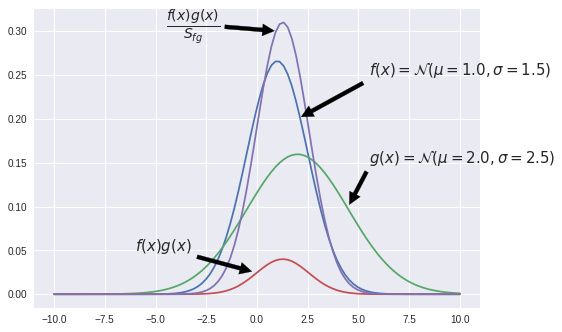

G_f(x)의  -inf~inf 정적분        : 1.000000
G_g(x)의  -inf~inf 정적분        : 1.000000
G_fg(x)의 -inf~inf 정적분        : 0.129019
G_fg(x)의 -inf~inf 정적분 / S_gf : 1.000000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib as mpl
mpl.style.use('seaborn')

x = np.linspace(-10, 10, 100)

class Gaussian :
    def __init__(self, mu, sigma, scaled_const=1) :
        """
        정규분포의 파라미터 2개외에 scaled_const를 정의
        scaled_const는 정규화된 경우 1이다.
        """
        self.mu = mu
        self.sigma = sigma
        self.scaled_const = scaled_const
        
    def pdf(self, x):
        return self.scaled_const / (np.sqrt(2*np.pi)*self.sigma) * np.exp( -((x-self.mu)**2)/(2*self.sigma**2) )

    def __mul__(self, other) :
        """
        식(1.3),(1.4),(1.5)을 이용해서 연산자 오버로딩을 한다.
        """
        #eq 1.4
        mu = ((self.mu*(other.sigma**2))+(other.mu*(self.sigma**2))) / (self.sigma**2 + other.sigma**2) 
        
        #eq 1.5
        sigma = np.sqrt( ((self.sigma**2) * (other.sigma**2)) / (self.sigma**2 + other.sigma**2) ) 
        
        #eq 1.3
        S_fg = 1/np.sqrt(2*np.pi*(self.sigma**2 + other.sigma**2))*np.exp(-((self.mu-other.mu)**2)/(2*(self.sigma**2 + other.sigma**2))) 
    
        return Gaussian(mu, sigma, S_fg)
    
g_f  = Gaussian(1.0, 1.5)
g_g  = Gaussian(2.0, 2.5)
g_fg = g_f*g_g

plt.plot(x, g_f.pdf(x), x, g_g.pdf(x), x, g_fg.pdf(x), x, g_fg.pdf(x)/g_fg.scaled_const)
plt.annotate('$f(x)=\mathcal{N}(\mu=1.0, \sigma=1.5)$', xy=(2.0, 0.2), xytext=(5.5, 0.25), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$g(x)=\mathcal{N}(\mu=2.0, \sigma=2.5)$', xy=(4.5, 0.1), xytext=(5.5, 0.15), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$f(x)g(x)$', xy=(-0.1, 0.025), xytext=(-6, 0.05), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(r"$\frac{f(x)g(x)}{S_{fg}}$", xy=(1.0, 0.3), xytext=(-4.5, 0.3), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print("G_f(x)의  -inf~inf 정적분        : {:f}".format(integrate.quad(g_f.pdf,  -np.inf, np.inf)[0]))
print("G_g(x)의  -inf~inf 정적분        : {:f}".format(integrate.quad(g_g.pdf,  -np.inf, np.inf)[0]))
print("G_fg(x)의 -inf~inf 정적분        : {:f}".format(integrate.quad(g_fg.pdf, -np.inf, np.inf)[0]))
print("G_fg(x)의 -inf~inf 정적분 / S_gf : {:f}".format(integrate.quad(g_fg.pdf, -np.inf, np.inf)[0]/g_fg.scaled_const))

# 2. 베이즈정리와 정규분포의 곱
<hr/>

- 데이터의 분포가 정규분포라고 가정하고 베이즈룰에 따라 데이터에 대한 파라미터의 사후확률을 계산한다.

- 많은 부분 Conjugate Bayesian analysis of the Gaussian distribution<a href="https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf"><sup>[2]</sup></a>를 참고했다.

- $D$를 $n$개의 관측 데이터, $p(\mu \,|\, \mu_0, \sigma^2_0)$를 파라미터 $\mu$의 사전확률라고 하면 ($\sigma^2$, $\sigma^2_0$ 는 알려진것으로 가정) $\mu$에 대한 사후확률은 다음과 같다.

$$
p(\mu \,|\, D) = \frac{p(D \,|\, \mu, \sigma^2) \, p(\mu \,|\, \mu_0, \sigma^2_0)}{p(D)} \tag{2.1}
$$

## 2.1 가능도Likelihood
<hr/>

- 관측 데이터를 i.i.d로 가정하면 다음과 같이 가능도 함수는 각 데이터의 확률분포의 곱이다.

$$
\begin{align*}
p(D \,|\, \mu, \sigma^2) 
&= \prod_{i = 1}^{n} \left[ \frac{1}{\sqrt{2\pi \sigma^2}} \text{exp}\left\{ -\frac{1}{2\sigma^2} (x_{i}-\mu)^2 \right\} \right] \\[4pt]
&=  \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^{n} \left[ \text{exp}\left\{ -\frac{1}{2\sigma^2} (x_{1}-\mu)^2 \right\}  \text{exp}\left\{ -\frac{1}{2\sigma^2} (x_{2}-\mu)^2 \right\} \cdots \text{exp}\left\{ -\frac{1}{2\sigma^2} (x_{n}-\mu)^2 \right\} \right] \\[4pt]
&=  \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} }  \text{exp}\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{n}-\mu)^2 \right\}
\end{align*}  \tag{2.2}
$$

## 2.2 사전확률Prior
<hr/>

- 공액 사전확률로 정규분포를 파라미터 $\mu$의 사전확률분포로 선택한다.

$$
p(\mu \,|\, \mu_0, \sigma^2_0) = \color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } \text{exp} \left\{  -\frac{1}{2\sigma_0^2} (\mu-\mu_0)^2 \right\} \tag{2.3}
$$


## 2.3 가능도 $\times$ 사전확률
<hr/>

- 식(2.1)의 분자 계산을 위해 식(2.2)와 식(2.3)을 곱한다.

$$
\begin{align}
p(D \,|\, \mu, \sigma^2) p(\mu \,|\, \mu_0, \sigma^2_0) 
&= \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} } \color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } \text{exp}\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2 \right\}  \text{exp} \left\{  -\frac{1}{2\sigma_0^2} (\mu-\mu_0)^2 \right\}
\end{align} \tag{2.4}
$$

- 색깔 부분을 $ C_1 = \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} } \color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } $ 로 두고 계속한다.

$$
\begin{align}
p(D \,|\, \mu, \sigma^2) p(\mu \,|\, \mu_0, \sigma^2_0) 
&= \color{DarkOrchid}{ C_1 } \text{exp}\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2 \right\}  \text{exp} \left\{  -\frac{1}{2\sigma_0^2} (\mu-\mu_0)^2 \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2  -\frac{1}{2\sigma_0^2} (\mu-\mu_0)^2 \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}^{2}-2x_{i}\mu + \mu^2)  -\frac{1}{2\sigma_0^2} (\mu^2 - 2\mu_{0}\mu + \mu_{0}^{2}) \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n}x_{i}^{2} +\frac{1}{\sigma^2}\sum_{i=1}^{n}x_{i}\mu - \frac{1}{2\sigma^2}n\mu^2  - \frac{1}{2\sigma_0^2} \mu^2 + \frac{1}{\sigma_0^2}\mu_{0}\mu - \frac{1}{2\sigma_0^2}\mu_{0}^{2} \right\} \\[4pt]
\end{align} \tag{2.5}
$$

- $\mu$에 대한 2차식으로 묶으면

$$
\begin{align}
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2} \left( \frac{n}{\sigma^2} + \frac{1}{\sigma_0^2} \right) \mu^{2} + \left(\frac{\sum x_{i}}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}  \right) \mu - \left( \frac{\mu_0^{2}}{2\sigma_0^2} + \frac{\sum x_{i}^{2}}{2\sigma^2} \right) \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2} \left( \frac{n}{\sigma^2} + \frac{1}{\sigma_0^2} \right) \mu^{2} + \left(\frac{\sum x_{i}}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}  \right) \mu - \frac{1}{2} \left( \frac{\mu_0^{2}}{\sigma_0^2} - \frac{\sum x_{i}^{2}}{\sigma^2} \right) \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2} \left( \frac{n\sigma_{0}^{2}+\sigma^2}{\sigma^{2}\sigma_{0}^{2}}  \right) \mu^{2} + \left( \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{\sigma^{2}\sigma_{0}^{2}} \right) \mu - \frac{1}{2} \left( \frac{\mu_0^{2}\sigma^{2}-\sigma_{0}^{2}\sum x_{i}^{2}}{\sigma^{2}\sigma_{0}^{2}} \right) \right\} \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left[ -\frac{1}{2} \frac{1}{\sigma^{2}\sigma_{0}^{2}} \left\{ \left( n\sigma_{0}^{2}+\sigma^2 \right) \mu^{2} - 2 \left( \sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2} \right) \mu + \left( \mu_0^{2}\sigma^{2}+\sigma_{0}^{2}\sum x_{i}^{2} \right) \right\} \right] \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left[ -\frac{1}{2} \frac{\left( n\sigma_{0}^{2}+\sigma^2 \right)}{\sigma^{2}\sigma_{0}^{2}} \left\{ \mu^{2} - 2 \left( \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right) \mu + \left( \frac{\sigma_{0}^{2}\sum x_{i}^{2}+\mu_0^{2}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right) \right\} \right] \\[4pt]
\end{align} \tag{2.6}
$$


- { } 부분을 완전제곱형태로 고친다. (completing the square)

$$
\begin{align}
&= \color{DarkOrchid}{ C_1 } \text{exp} \left[ -\frac{1}{2} \underbrace{\frac{\left( n\sigma_{0}^{2}+\sigma^2 \right)}{\sigma^{2}\sigma_{0}^{2}}}_{\dfrac{1}{\sigma^{2}_{n}}} \left\{ \left( \mu - \underbrace{\frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2}}_{\mu_{n}} \right)^{2} - \left(\frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2}  + \underbrace{\left( \frac{\sigma_{0}^{2}\sum x_{i}^{2}+\mu_0^{2}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)}_{C_2} \right\} \right] \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left[ -\frac{1}{2} \frac{1}{\sigma^{2}_{n}} \left\{ (\mu-\mu_{n})^{2} - \mu^{2}_{n} + C_2 \right\} \right] \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left[ -\frac{1}{2} \frac{1}{\sigma^{2}_{n}} (\mu-\mu_{n})^{2} + \frac{1}{2} \frac{1}{\sigma^{2}_{n}} \mu^{2}_{n} -\frac{1}{2} \frac{1}{\sigma^{2}_{n}} C_2 \right] \\[4pt]
&= \color{DarkOrchid}{ C_1 } \text{exp} \left\{ -\frac{1}{2} \frac{1}{\sigma^{2}_{n}} (\mu-\mu_{n})^{2} \right\} \text{exp} \left\{ \frac{1}{2} \frac{1}{\sigma^{2}_{n}} \mu^{2}_{n} \right\} \text{exp} \left\{ -\frac{1}{2} \frac{1}{\sigma^{2}_{n}} C_2 \right\}
\end{align} \tag{2.7}
$$

- 치환을 원래 모양으로 돌리면

$$
\begin{align}
=&\color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} }\color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } 
\text{exp} \left\{ \frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left( \frac{\sigma_{0}^{2} \sum x_{i}+\mu_{0}\sigma^{2}}{n \sigma_{0}^{2} + \sigma^2} \right)^{2} \right\}
\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left( \frac{\sigma_{0}^{2} \sum x_{i}^{2}+ \mu_0^{2}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right) \right\} \\
&\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\} \\[4pt]
= &\color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} }\color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}}  } 
\color{ForestGreen}{ \text{exp} \left\{ \frac{1}{2} \frac{(\sigma_0^2 \sum x_{i} + \mu_{0} \sigma^{2})^{2}}{\sigma^{2}\sigma_{0}^{2}(n\sigma_{0}^{2}+\sigma^2)} \right\} }
\color{Red}{ \text{exp} \left\{ -\frac{1}{2} \left( \frac{\sigma_{0}^{2} \sum x_{i}^{2}+ \mu_0^{2}\sigma^{2}}{\sigma^{2}\sigma_{0}^{2}} \right) \right\} } \\
& \text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\} \\[4pt]
\end{align} \tag{2.8}
$$



- 정리하면 사후확률의 분자는 아래와 같다.  

$$
\begin{align}
&p(D \,|\, \mu, \sigma^2) p(\mu \,|\, \mu_0, \sigma^2_0) \\
= & \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} }\color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } 
\color{ForestGreen}{ \text{exp} \left\{ \frac{1}{2} \frac{(\sigma_0^2 \sum x_{i} + \mu_{0} \sigma^{2})^{2}}{\sigma^{2}\sigma_{0}^{2}(n\sigma_{0}^{2}+\sigma^2)} \right\} }
\color{Red}{ \text{exp}\left\{ -\frac{1}{2} \frac{\sigma_{0}^{2} \sum x_{i}^{2}+ \mu_0^{2}\sigma^{2} }{\sigma^2\sigma_{0}^{2}} \right\} } \\
& \text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\} 
\end{align} \tag{2.9}
$$

- 위 식에서 색깔부분은 모두 상수이고, 식 자체는 사후확률과 비례하므로 사후확률은 평균을

$$
\mu_{n}= \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2}
$$

로하고 분산의 역수를

$$
\frac{1}{\sigma^{2}_{n}} = \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}}
$$

로 가지는 정규분포가 된다.

- 이를 완전히 확인하려면 식(2.1)에서 $p(D)$는 정규화 상수이므로 $p(D)$가 식(2.9)의 색깔있는 부분과 마지막 $\text{exp}(\cdot)$부분의 적분으로 되어있음을 확인하면 된다.


## 2.3 Marginal Likelihood
<hr/>

- 확률의 합법칙은 다음과 같다.

$$
P(X) = \sum_{Y} P(X,Y) = \sum_{Y} P(X|Y)P(Y) \tag{2.11}
$$

- 연속확률변수에 대해서는 적분으로 바꿔 생각할 수 있고, 가능도를 파라미터 $\mu$에 대해 주변화시키면 아래와 같다.

$$
p(D) = \int_{-\infty}^{\infty} \underbrace{P(D \,|\, \mu, \sigma^2)}_{likelihood} \underbrace{P(\mu \,|\, \mu_0, \sigma_0^2)}_{prior} \text{d}\mu \tag{2.12}
$$

- 식(2.12)를 실제로 적분해서 식(2.9)를 나눠본다.

$$
\begin{align}
p(D) &= \int_{-\infty}^{\infty} p(D \,|\, \mu, \sigma^2) p(\mu \,|\, \mu_0, \sigma^2_0) d\mu \\[4pt]
&= \int_{-\infty}^{\infty} \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} } \color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } \text{exp}\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2 \right\}  \text{exp} \left\{  -\frac{1}{2\sigma_0^2} (\mu-\mu_0)^2 \right\} \text{d}\mu 
\end{align} \tag{2.13}
$$

- 식(2.13)의 피적분 함수<sup>integrand</sup> 는 식(2.4)와 같으므로 피적분함수를 2.2절의 과정을 따라 똑같이 정리하면 다음과 같다.

$$
\begin{align}
p(D) &= \int_{-\infty}^{\infty} p(D \,|\, \mu, \sigma^2) p(\mu \,|\, \mu_0, \sigma^2_0) d\mu  \\
&= \color{DarkOrchid}{ \frac{1}{\left(\sqrt{2\pi \sigma^2}\right)^{n}} }\color{DarkOrchid}{ \frac{1}{\sqrt{2\pi \sigma_0^2}} } 
\color{ForestGreen}{ \text{exp} \left\{ \frac{1}{2} \frac{(\sigma_0^2 \sum x_{i} + \mu_{0} \sigma^{2})^{2}}{\sigma^{2}\sigma_{0}^{2}(n\sigma_{0}^{2}+\sigma^2)} \right\} }
\color{Red}{ \text{exp}\left\{ -\frac{1}{2} \frac{\sigma_{0}^{2} \sum x_{i}^{2}+ \mu_0^{2}\sigma^{2} }{\sigma^2\sigma_{0}^{2}} \right\} } \\
& \int_{-\infty}^{\infty} \text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\}  \text{d}\mu 
\end{align} \tag{2.14}
$$

- 결국 색깔 부분은 모두 약분되고 사후확률은 식(2.15)처럼 된다.

$$
p(\mu \,|\, D) = \frac{\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\}}
{
\int_{-\infty}^{\infty} \text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\}  \text{d}\mu 
}\tag{2.15}
$$

- 식(2.15)는 분자를 전영역에서 정적분해서 나눔으로써 분자에 있는 지수함수를 정규화하고 있다. 그래서 $p(\mu \,|\, D)$는 적분이 1이 되는 정규분포가 됨을 알 수 있다.

- 실제로 적분하기 위해서 지수항을 적분해야하는데 이는 가우스 적분으로 알려져있고 아래와 같다. 극좌표계로 바꿔서 적분하는 부분은 Youtube 강의에서 많이 찾아볼 수 있다. (예 : <a href="https://youtu.be/nqNzKeVCYBU">Evaluation of the Gaussian Integral exp(-x^2) - Cool Math Trick </a>)

$$
\int_{-\infty}^{\infty} \text{exp} ( -ax^2 ) dx = \sqrt{\frac{\pi}{a}} \tag{2.16}
$$

- 지금 적분해야하는 함수는 $\text{exp} \left\{ -a(x-b)^2 \right\}$ 꼴로 $\text{exp} ( -ax^2 )$가 시프트되어 있으므로 $u = x-b$로 치환하면 $du = dx$이고 결국  

$$
\int_{-\infty}^{\infty} \text{exp} \left\{ -a(x-b)^2 \right\} dx = \int_{-\infty}^{\infty} \text{exp} \left\{ -a(u)^2 \right\} du= \sqrt{\frac{\pi}{a}} \tag{2.17}
$$

같은 적분결과를 얻을 수 있다. 이 결과를 이용해서 적분해보면

$$
\int_{-\infty}^{\infty} \text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\}  d\mu 
= \sqrt{\dfrac{\pi}{\frac{ n\sigma_{0}^{2}+\sigma^2 }{2\sigma^{2}\sigma_{0}^{2}}}}
= \sqrt{{\frac{2\pi\sigma^{2}\sigma_{0}^{2}}{n\sigma_{0}^{2}+\sigma^2}}}
\tag{2.18}
$$

- 사후확률분포를 최종적으로 정리해보면 

$$
\begin{align}
p(\mu \,|\, D) &= \frac{\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\}}{\sqrt{\frac{2\pi\sigma^{2}\sigma_{0}^{2}}{n\sigma_{0}^{2}+\sigma^2}}} \\[4pt]
&= \sqrt{\frac{n\sigma_{0}^{2}+\sigma^2}{2\pi\sigma^{2}\sigma_{0}^{2} }}
\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\} \\[4pt]
&= \sqrt{\frac{1}{2\pi}\frac{n\sigma_{0}^{2}+\sigma^2}{\sigma^{2}\sigma_{0}^{2}}}
\text{exp} \left\{ -\frac{1}{2} \frac{ n\sigma_{0}^{2}+\sigma^2 }{\sigma^{2}\sigma_{0}^{2}} \left(\mu- \frac{\sigma_{0}^{2} \sum x_{i} + \mu_{0}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^2} \right)^{2} \right\} \\[4pt]
&= \sqrt{\frac{1}{2\pi \sigma^{2}_{n}}} \text{exp} \left\{ - \frac{1}{2 \sigma^{2}_{n}} \left( \mu - \mu_{n} \right)^{2} \right\}
\end{align}
\tag{2.19}
$$


- 이렇게 해서 정규분포를 이용한 사후확률분포를 구해보았다.

- 위 내용을 다변수 정규분포로 확장하고 싶으면 <a href="http://cs229.stanford.edu/section/more_on_gaussians.pdf?fref=gc">More on Multivariate Gaussians</a><sup>[3]</sup>와 페이스북 아이디 <a href="http://nbviewer.jupyter.org/github/maestrojeong/Machine_learning/blob/master/Gaussian_Process/gaussian_process_theory.ipynb?fref=gc">Yeon Woo Jeong</a><sup>[4]</sup>님의 정리를 보면 도움이 된다.

- 같은 내용을 이항분포, 베타분포에 대해서 계산한것은 페이스북 아이디 Issac Lee님의 <a href="http://issactoast.com/116">이항분포와 베타분포의 궁합! 켤레사전분포(Conjugate prior dist.)에 대하여</a><sup>[5]</sup>를 보면 된다.


# 3. 일변수 정규분포의 곱으로써의 다변수 정규분포 (참고)
<hr/>

- 1 장에서 두 일변수 정규분포의 곱이 정규화되지 않은 정규분포가 되는 것을 확인했었다. 

- 이는 곱해지는 두 정규분포의 독립변수를 같은 변수로 보고 곱했을 때 이야기다. 즉 $\mathbb{R} \times \mathbb{R} \to \mathbb{R}$인 경우이다. 

- 만약 두 변수를 다른 변수로 보고 $\mathbb{R} \times \mathbb{R} \to \mathbb{R}^2$가 되는 경우라면 어떻게 될까? 

- 결과만 이야기하면 두 정규분포를 곱하는것만으로도 다변수 정규분포가 된다.

- 그 과정을 확인 해본다.

$$
f(x_1) = \frac{1}{ \sqrt{2 \pi}}\frac{1}{ \sqrt{\sigma_{1}^{2}} } \exp \left\{{-\frac{(x_1-\mu_1)^2}{2 \sigma^{2}_{1}}}\right\} \tag{3.1}
$$

$$
g(x_2) = \frac{1}{ \sqrt{2 \pi}}\frac{1}{ \sqrt{\sigma_{2}^{2}} } \exp \left\{{-\frac{(x_2-\mu_2)^2}{2 \sigma^{2}_{2}}}\right\} \tag{3.2}
$$

식(3.1), (3.2)처럼 일변수 정규분포의 변수를 각가 다른 변수로 보고 서로 곱하면

$$
\begin{align}
f(x_1, x_2) 
&= \frac{1}{ \sqrt{2 \pi}}\frac{1}{ \sqrt{\sigma_{1}^{2}} } \exp \left\{{-\frac{(x_1-\mu_1)^2}{2 \sigma^{2}_{1}}}\right\} \frac{1}{ \sqrt{2 \pi}}\frac{1}{ \sqrt{\sigma_{2}^{2}} } \exp \left\{{-\frac{(x_2-\mu_2)^2}{2 \sigma^{2}_{2}}}\right\} \\[5pt]
&= \frac{1}{ (2 \pi)^{2/2} }  \frac{1}{ (\sigma_{1}^{2})^{1/2} } \frac{1}{ (\sigma_{2}^{2})^{1/2} } \exp \left\{-\frac{1}{2} \left( \frac{(x_1-\mu_1)^2}{ \sigma^{2}_{1}} + \frac{(x_2-\mu_2)^2}{ \sigma^{2}_{2}}\right)\right\}  
\end{align} \tag{3.3}
$$

가 된다. 지수항 부분을 행렬-벡터형태로 바꿀 수 있다. $\mathbf{x} = (x_1, x_2)^{\text{T}}$, $\boldsymbol{\mu} = (\mu_1, \mu_2)^{\text{T}}$로 두면

$$
f(\mathbf{x}) = \frac{1}{ (2 \pi)^{2/2} }   \frac{1}{ \left(\sigma_{1}^{2}  \sigma_{2}^{2}  \right)^{1/2} }\exp \left\{ -\frac{1}{2}  \begin{Bmatrix} x_1-\mu_1 \\ x_2-\mu_2  \end{Bmatrix}^{\text{T}} \begin{bmatrix}
\frac{1}{\sigma_1^2} &  0 \\
0 &  \frac{1}{\sigma_2^2}
\end{bmatrix} \begin{Bmatrix} x_1-\mu_1 \\ x_2-\mu_2  \end{Bmatrix} \right\} \tag{3.4}
$$

로 행렬-벡터 형태로 쓸 수 있다. 곱하기 전 각 함수의 분산 $\sigma^2_1$, $\sigma^2_2$를 주대각 요소로 가지는 대각 행렬을 

$$
\Sigma = \begin{bmatrix}
\sigma_1^2 &  0 \\
0 &  \sigma_2^2
\end{bmatrix}
$$

로 두면 이 행렬의 역행렬과 행렬식은 

$$
\Sigma^{-1}= \begin{bmatrix}
\dfrac{1}{\sigma_1^2} &  0 \\
0 &  \dfrac{1}{\sigma_2^2}
\end{bmatrix} 
$$

$$
\det(\Sigma) = \sigma_1^2  \sigma_2^2
$$

위 결과를 이용하고 이변수라서 $D$=2로 놓고 식(3.4)를 다시 써보면

$$
f(\mathbf{x}) = \frac{1}{ (2 \pi)^{2/2} }   \frac{1}{ \det(\Sigma)^{1/2} }\exp \left\{ -\frac{1}{2}  (\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right\} \tag{3.5}
$$

가 되어 완전한 2변수 정규분포함수가 됨을 알 수 있다.

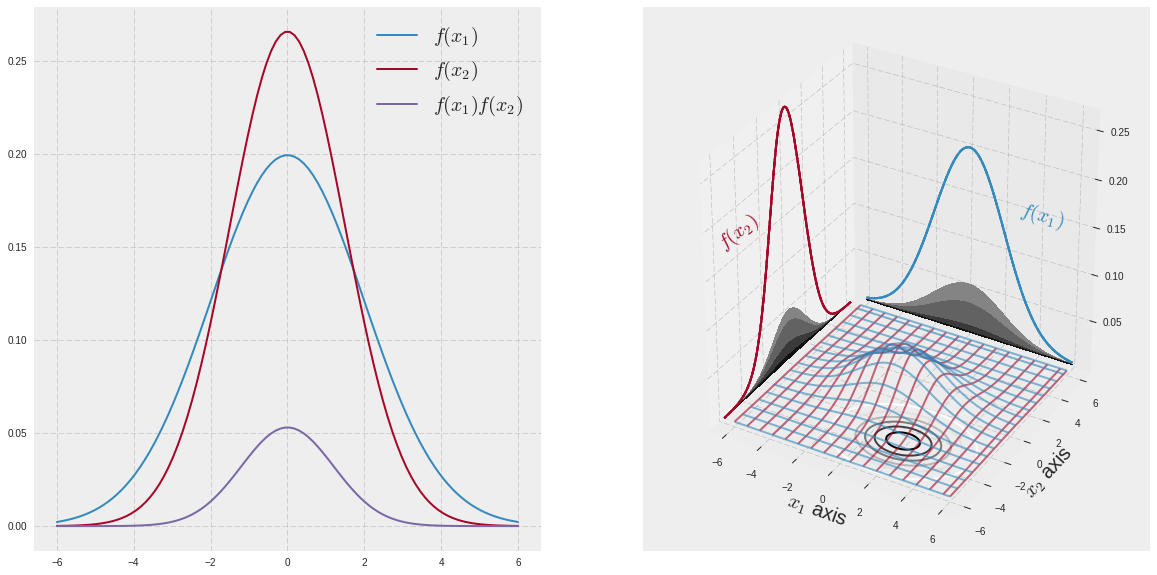

In [4]:
from mpl_toolkits.mplot3d import Axes3D

mpl.style.use('bmh')
plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()

g_1  = Gaussian(0.0, 2.0)
g_2  = Gaussian(0.0, 1.5)
g_12 = g_1*g_2

# 그냥 곱한 경우
x = np.linspace(-6, 6, 100)
g_x1 = g_1.pdf(x)
g_x2 = g_2.pdf(x)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, g_1.pdf(x), label=r'$f(x_1)$')
ax1.plot(x, g_2.pdf(x), label=r'$f(x_2)$')
ax1.plot(x, g_12.pdf(x), label=r'$f(x_1)f(x_2)$')
legend = ax1.legend(loc='upper right',fontsize=20)

# 2변수로 곱한 경우
g_x1m = np.tile(g_x1, (100, 1))
g_x2m = np.tile(g_x2, (100, 1))

xx1, xx2 = np.meshgrid(x, x)
G = np.dot(g_2.pdf(x).reshape(-1,1), g_1.pdf(x).reshape(1,-1))

#plt3d = plt.figure().gca(projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.plot_wireframe(xx1, xx2, G, rstride=0, cstride=6, alpha=0.6, colors="#A60628")
ax2.plot_wireframe(xx1, xx2, G, rstride=6, cstride=0, alpha=0.6, colors="#348ABD")

#파란 그래프
ax2.contourf(xx1, xx2, G, zdir='y',  offset=ax2.get_ylim()[1])
ax2.contour(xx1, xx2, g_x1m, zdir='y', colors='#348ABD', alpha=0.7, offset=ax2.get_ylim()[1])

#빨간 그래프
ax2.contourf(xx1, xx2, G, zdir='x',  offset=ax2.get_xlim()[0])
ax2.contour(xx1, xx2, g_x2m.T, zdir='x',  colors='#A60628', alpha=0.7, offset=ax2.get_xlim()[0])

ax2.contour(xx1, xx2, G, zdir='z',  offset=-0.05)

ax2.text(3, 6, 0.15, r'$f(x_1)$', color='#348ABD', zdir='x', fontsize=20)
ax2.text(-6.8, -6, 0.20, r'$f(x_2)$', color='#A60628', zdir='y', fontsize=20)

ax2.set_xlabel(r'$x_1$ axis',fontsize=20)
ax2.set_ylabel(r'$x_2$ axis',fontsize=20)

plt.show()

- 위 코드는 지금까지 내용을 실험한 것이다. 두 정규분포 함수 $f(x_1)=\mathcal{N}(x_1 \mid \mu_1 = 0.0, \sigma^2_1=2.0)$, $f(x_2)=\mathcal{N}(x_2 \mid \mu_2= 0.0, \sigma_2^2=1.5)$가 있을 때 이를 그냥 일변수 상태에서 곱해서 그린것이 왼쪽 보라색 그래프이다. 
그림에서 붉은색과 파란색 그래프 아래 넓이가 1이기 때문에 키가 작은 보라색 그래프 아래 넓이는 1이 아님을 알 수 있다. 

- 이 두 함수를 $x_1$과 $x_2$를 두 축으로 하는 이차원 평면에 그려보면 오른쪽 그림처럼 언덕 모양의 함수가 된다. 
이 경우에도 $f(x_1)$과 $f(x_2)$의 두 값이 곱해져서 함수값이 결정되므로 언덕의 키는 원래 두 함수 보다 작아졌다. 하지만 적분값이 1이 됨을 식(3.5)를 유도하면서 간접적으로 확인해보았다. 직관적으로는 키는 작아졌지만 적분값이 그래프 아래 부피가 되기 때문에 키가 작아진 만큼 충분히 커져서 1이 된다고 이해할 수 있다. 

- 그래프에서 회색 그림자는 언덕을 $x_1z$, $x_2 z$평면으로 투영 시킨 그림자이다. 그림자를 보면 파란색 그래프 아래 그림자가 붉은색 그래프 아래 그림자 보다 넓게 퍼져있는 것을 확인할 수 있다.

- 이 상태에서 $x_2$의 값을 하나로 고정시킨 $f(x_1, x_2=-2)$ 그래프를 그려보고 이 그래프 아래의 넓이가 얼마가 되는지 알아보자. 해당 그래프는 위 오른쪽 그래프에서 $x_2=-2$에 해당하는 파란색 와이어 프레임 그래프가 되므로 키가 0.05보다 작은 종모양 그래프가 될것이다. (가장 높은 $x_2=0$에서의 키가 0.05이므로)

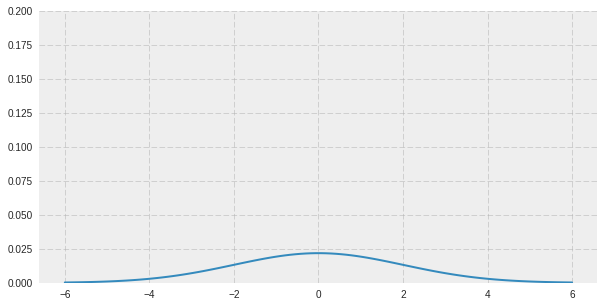

0.10934004978399578

In [7]:
import scipy.integrate as integrate

def mvn(x1):
    return (g_1.pdf(x1)*g_2.pdf(-2))

plt.rcParams["figure.figsize"] = (10, 5)

# mvn(x) = p(x1, x2=-2) != p(x1|x2=-2)
plt.plot(x, mvn(x))
#plt.plot(x, mvn(x), x, mvn(x)/g_2.pdf(-2))
plt.ylim(0, 0.2)
plt.show()

# integral
integrate.quad(mvn, -np.inf, np.inf)[0]

- 위 그래프의 적분값은 0.109정도가 되어 정규화되지 않은 상태임을 알 수 있다. 위에 보이는 그래프는 두 확률변수의 결합확률분포 $f(x_1,x_2)$를 나타내는 그래프에서 $x_2$를 한 값으로 고정시켰을때 그래프가 된다. 

- 이를 $x_2$를 조건으로하는 $x_1$의 확률분포로 나타내려면 베이즈정리에 의해

$$
f(x_1 \mid x_2=-2) = \frac{f(x_1, x_2=-2)}{f(x_2=-2)} \tag{3.6}
$$

처럼 $f(x_2=-2)$로 정규화 시켜주면 

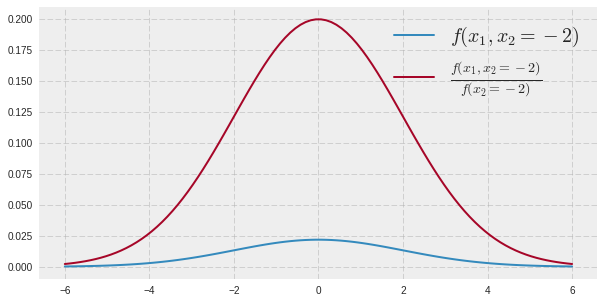

In [6]:
plt.plot(x, mvn(x), label=r'$f(x_1, x_2=-2)$')
plt.plot(x, mvn(x)/g_2.pdf(-2), label=r'$\frac{f(x_1, x_2=-2)}{f(x_2=-2)}$')
legend = plt.legend(loc='upper right',fontsize=20)
plt.show()

- 위 그래프처럼 붉은색 그래프가 되어 다시 $f(x_1)$으로 돌아오게 된다. 이는 

$$
f(x_1 \mid x_2=-2) = \frac{f(x_1, x_2=-2)}{f(x_2=-2)}  = \frac{f(x_1)f(x_2=-2)}{f(x_2=-2)}=f(x_1) \tag{3.7}
$$

이 되는 것으로 당연한 결과이며 식(3.7)은 두 변수가 서로 독립임을 의미한다. 

- 이 결과는 $f(x_1, x_2)=f(x_1)f(x_2)$인 정의와도 잘 합치한다.

# 4. 참고문헌
<hr/>

1. Products and Convolutions of Gaussian Probability Density Functions, P.A. Bromiley, http://www.tina-vision.net/docs/memos/2003-003.pdf

2. Conjugate Bayesian analysis of the Gaussian distribution, Kevin P. Murphy, https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf

3. More on Multivariate Gaussians, Chuong B. Do, http://cs229.stanford.edu/section/more_on_gaussians.pdf?fref=gc

4. Gaussian_Process, Yeon Woo Jeong, http://nbviewer.jupyter.org/github/maestrojeong/Machine_learning/blob/master/Gaussian_Process/gaussian_process_theory.ipynb?fref=gc

5.  이항분포와 베타분포의 궁합! 켤레사전분포(Conjugate prior dist.)에 대하여, Issac Lee, http://issactoast.com/116


In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    p  { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    li > p { text-indent: 0px; }
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
   
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
</style>